# House price regression

The main goal of this project is to estimate the sale price of real estate

## Problem
We got hired by a real estate investor in order to propose him a software solution to estimate quickly the value of housholds. The goal of this application is to scan the whole real estate market in order to indentify undervaluate household.

## Solution
To answer this problem, we propose a regression algorithm that will estimate the value of household given some specific properties. Then by comparing the estimate value against the market value, we'll be able to spot investment opportunities

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

### Data import, cleaning and analysis
The first step would be to import the data in order to prepare it for the algorithm.
To do so, we'll start by importing the data and list every feature

In [2]:
data = pd.read_csv('train.csv')
for name,dtype in zip(data.columns, data.dtypes):
    print(name,": ", dtype, "         Ex: ", data[name].iloc[0], "    Number of NaN: ", data[name].isnull().sum())

Id :  int64          Ex:  1     Number of NaN:  0
MSSubClass :  int64          Ex:  60     Number of NaN:  0
MSZoning :  object          Ex:  RL     Number of NaN:  0
LotFrontage :  float64          Ex:  65.0     Number of NaN:  259
LotArea :  int64          Ex:  8450     Number of NaN:  0
Street :  object          Ex:  Pave     Number of NaN:  0
Alley :  object          Ex:  nan     Number of NaN:  1369
LotShape :  object          Ex:  Reg     Number of NaN:  0
LandContour :  object          Ex:  Lvl     Number of NaN:  0
Utilities :  object          Ex:  AllPub     Number of NaN:  0
LotConfig :  object          Ex:  Inside     Number of NaN:  0
LandSlope :  object          Ex:  Gtl     Number of NaN:  0
Neighborhood :  object          Ex:  CollgCr     Number of NaN:  0
Condition1 :  object          Ex:  Norm     Number of NaN:  0
Condition2 :  object          Ex:  Norm     Number of NaN:  0
BldgType :  object          Ex:  1Fam     Number of NaN:  0
HouseStyle :  object          Ex: 

In [3]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
data.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [5]:
for column in data:
    print(data[column].value_counts()) 


1460    1
479     1
481     1
482     1
483     1
       ..
976     1
977     1
978     1
979     1
1       1
Name: Id, Length: 1460, dtype: int64
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64
7200     25
9600     24
6000     17
10800    14
9000     14
         ..
7094      1
6130      1
9337      1
5232      1
8190      1
Name: LotArea, Length: 1073, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311


2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64
140000    20
135000    17
145000    14
155000    14
190000    13
          ..
84900      1
424870     1
415298     1
62383      1
34900      1
Name: SalePrice, Length: 663, dtype: int64


Comme ça on peut identifier les quatiers ou il y a beaucoup de ventes et le genre de maison

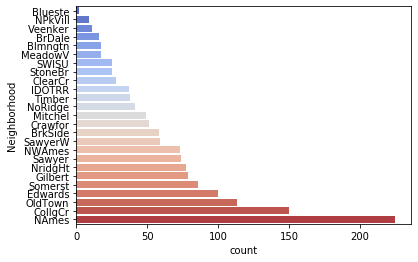

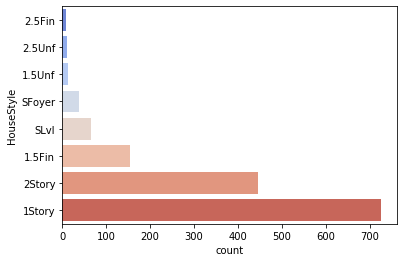

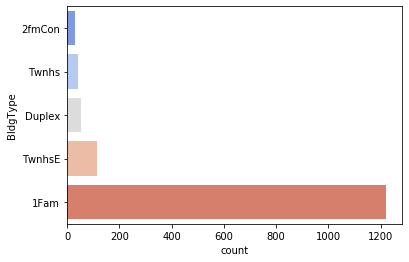

In [6]:
ax = sns.countplot(y="Neighborhood", data=data, order=data["Neighborhood"].value_counts().sort_values().index, palette ='coolwarm') #comment changer la taille
plt.show()
ax = sns.countplot(y="HouseStyle", data=data, order=data["HouseStyle"].value_counts().sort_values().index, palette ='coolwarm') #comment changer la taille
plt.show()
ax = sns.countplot(y="BldgType", data=data, order=data["BldgType"].value_counts().sort_values().index, palette ='coolwarm') #comment changer la taille
plt.show()

In [7]:
# et aussi la distribution de prix

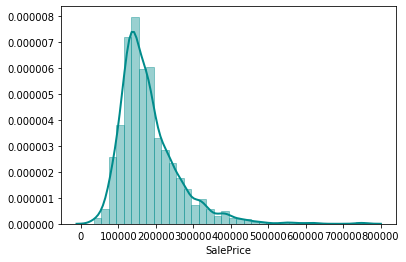

In [8]:
sns.distplot(data["SalePrice"], hist=True, kde=True, 
             bins=int(180/5), color = 'darkcyan', 
             hist_kws={'edgecolor':'darkcyan'},
             kde_kws={'linewidth': 2})

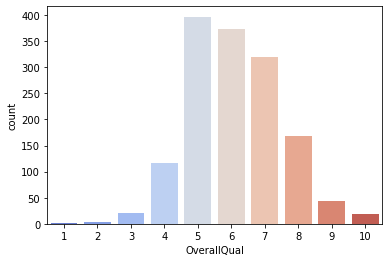

In [9]:
ax = sns.countplot(x="OverallQual", data=data, palette ='coolwarm') 
plt.show() 

# Clean Nan

Given this analysis, we can notice that some features do not contain any valuable information. The ID Column is a good example. For this reason the ID column will be droped from the test set

In addition of that, we notice that there is many missing values. The job here would be to differanciate missing values (errors in the dataset) from the absence of the concernate feature in the house. 

In the first case some columns have a high amount of missing values and might be related to other column that are more complete. The columns with a significant amount of missing values are: 
    - LotFrontage: 259 NaN
    - Alley: 1369 NaN
    - FireplaceQu: 690 NaN
    - PoolQC: 1453 NaN
    - Fence: 1179 NaN
    - MiscFeature: 1406 NaN
    
For LotFrontage, since there is difficult to have no frontage we assumed that the NaN values can be replaced by the median. For PoolQC and MiscFeature that have above 95% of missing values and taken into account that the features PoolArea and MiscVal were complete, it was possible to remowe the features. In the case of the others the NaN values were set to 0 since it is probable that they the houses do not have this feature. 

For the same reason, all the lower missing value number were also set to 0. 

In [10]:
#Trop de Nan et était déjà quasiment expliqué par une autre colonne
data_cleaned=data.drop(columns=["Id","PoolQC","MiscFeature"] )  

data_cleaned['LotFrontage'] = data_cleaned['LotFrontage'].fillna(data_cleaned['LotFrontage'].median()) #remplacer les Nan par la médiane
data_cleaned['Alley'] = data_cleaned['Alley'].fillna(0) #y'a pas d'alley donc 0
data_cleaned['MasVnrType'] = data_cleaned['MasVnrType'].fillna('None') #Car la plupart des valeur c'est None
data_cleaned['MasVnrArea'] = data_cleaned['MasVnrArea'].fillna(0) #quand y'en a pas


#la y'a juste pas de basement
data_cleaned['BsmtQual'] = data_cleaned['BsmtQual'].fillna(0)
data_cleaned['BsmtCond'] = data_cleaned['BsmtCond'].fillna(0)
data_cleaned['BsmtExposure'] = data_cleaned['BsmtExposure'].fillna(0)
data_cleaned['BsmtFinType1'] = data_cleaned['BsmtFinType1'].fillna(0)
data_cleaned['BsmtFinType2'] = data_cleaned['BsmtFinType2'].fillna(0)
data_cleaned['BsmtCond'] = data_cleaned['BsmtCond'].fillna(0)


data_cleaned['Electrical'] = data_cleaned['Electrical'].fillna(0) #disont que cette maison n'a pas d'électricité

data_cleaned['FireplaceQu'] = data_cleaned['FireplaceQu'].fillna(0) #et pas de Fireplace

data_cleaned['GarageType'] = data_cleaned['GarageType'].fillna(0) # ni garage
data_cleaned['GarageYrBlt'] = data_cleaned['GarageYrBlt'].fillna(0) 
data_cleaned['GarageFinish'] = data_cleaned['GarageFinish'].fillna(0) 
data_cleaned['GarageQual'] = data_cleaned['GarageQual'].fillna(0) 
data_cleaned['GarageCond'] = data_cleaned['GarageCond'].fillna(0) 

data_cleaned['Fence'] = data_cleaned['Fence'].fillna(0) #pas de cloture

for name,dtype in zip(data_cleaned.columns, data_cleaned.dtypes):
    print(name,": ", dtype, "         Ex: ", data_cleaned[name].iloc[0], "    Number of NaN: ", data_cleaned[name].isnull().sum())

MSSubClass :  int64          Ex:  60     Number of NaN:  0
MSZoning :  object          Ex:  RL     Number of NaN:  0
LotFrontage :  float64          Ex:  65.0     Number of NaN:  0
LotArea :  int64          Ex:  8450     Number of NaN:  0
Street :  object          Ex:  Pave     Number of NaN:  0
Alley :  object          Ex:  0     Number of NaN:  0
LotShape :  object          Ex:  Reg     Number of NaN:  0
LandContour :  object          Ex:  Lvl     Number of NaN:  0
Utilities :  object          Ex:  AllPub     Number of NaN:  0
LotConfig :  object          Ex:  Inside     Number of NaN:  0
LandSlope :  object          Ex:  Gtl     Number of NaN:  0
Neighborhood :  object          Ex:  CollgCr     Number of NaN:  0
Condition1 :  object          Ex:  Norm     Number of NaN:  0
Condition2 :  object          Ex:  Norm     Number of NaN:  0
BldgType :  object          Ex:  1Fam     Number of NaN:  0
HouseStyle :  object          Ex:  2Story     Number of NaN:  0
OverallQual :  int64       

In [11]:

data_cleaned['MSZoning'] = data_cleaned['MSZoning'].replace("C (all)", 0).replace("RH", 1).replace("RM", 2).replace("RL", 3).replace("FV", 4)
data_cleaned['Street'] = data_cleaned['Street'].replace("Grvl", 1).replace("Pave", 2)
data_cleaned['Alley'] = data_cleaned['Alley'].replace("Grvl", 1).replace("Pave", 2)
data_cleaned['LotShape'] = data_cleaned['LotShape'].replace("Reg", 0).replace("IR1", 1).replace("IR2", 2).replace("IR3", 3) #retrouver le petit quartier pour adapter les codes
data_cleaned['LandContour'] = data_cleaned['LandContour'].replace("Low", 0).replace("HLS", 1).replace("Bnk", 2).replace("Lvl", 3) #A voir si les valeur ont du sens
data_cleaned['Utilities'] = data_cleaned['Utilities'].replace("NoSeWa", 0).replace("AllPub", 1)
data_cleaned['LotConfig'] = data_cleaned['LotConfig'].replace("Inside", 0).replace("Corner", 1).replace("FR2", 2).replace("FR3", 3).replace("CulDSac", 4)
data_cleaned['LandSlope'] = data_cleaned['LandSlope'].replace("Sev", 0).replace("Mod", 1).replace("Gtl", 2)
data_cleaned['Neighborhood'] = data_cleaned['Neighborhood'].replace("NAmes", 0).replace("CollgCr",1).replace("OldTown",2).replace("Edwards",3).replace("Somerst", 4).replace("Gilbert", 5).replace("NridgHt", 6).replace("Sawyer", 7).replace("NWAmes",8).replace("SawyerW", 9).replace("BrkSide",10).replace("Crawfor",11).replace("Mitchel",12).replace("NoRidge", 13).replace("Timber", 14).replace("IDOTRR", 15).replace("ClearCr",16).replace("SWISU", 17).replace("StoneBr", 18).replace("Blmngtn", 19).replace("MeadowV", 20).replace("BrDale", 21).replace("Veenker", 22).replace("NPkVill", 23).replace("Blueste", 24)

data_cleaned['Condition1'] = data_cleaned['Condition1'].replace("Norm", 0).replace("Feedr", 1).replace("Artery", 2).replace("RRAn", 3).replace("PosN", 4).replace("RRAe", 5).replace("PosA", 6).replace("RRNn", 7).replace("RRNe", 8)
data_cleaned['Condition2'] = data_cleaned['Condition2'].replace("Norm", 0).replace("Feedr", 1).replace("Artery", 2).replace("RRAn", 3).replace("PosN", 4).replace("RRAe", 5).replace("PosA", 6).replace("RRNn", 7).replace("RRNe", 8)

data_cleaned['BldgType'] = data_cleaned['BldgType'].replace("1Fam", 0).replace("TwnhsE", 1).replace("Duplex", 2).replace("Twnhs", 3).replace("2fmCon", 4)
data_cleaned['HouseStyle'] = data_cleaned['HouseStyle'].replace("1Story", 0).replace("2Story", 1).replace("1.5Fin", 2).replace("SLvl", 3).replace("SFoyer", 4).replace("1.5Unf", 5).replace("2.5Unf", 6).replace("2.5Fin", 7)

data_cleaned['RoofStyle'] = data_cleaned['RoofStyle'].replace("Gable", 0).replace("Hip", 1).replace("Flat", 2).replace("Gambrel", 3).replace("Mansard", 4).replace("Shed", 5)
data_cleaned['RoofMatl'] = data_cleaned['RoofMatl'].replace("CompShg", 0).replace("Tar&Grv", 1).replace("MetalSd", 2).replace("WdShngl", 3).replace("WdShake", 4).replace("ClyTile",6).replace("Membran", 6).replace("Roll", 7).replace("Metal", 8)

data_cleaned['Exterior1st'] = data_cleaned['Exterior1st'].replace("VinylSd", 0).replace("HdBoard", 1).replace("MetalSd", 2).replace("Wd Sdng", 3).replace("Plywood", 4).replace("CemntBd",5).replace("BrkFace", 6).replace("WdShing", 7).replace("Stucco", 8).replace("AsbShng", 9).replace("Stone",10).replace("BrkComm", 11).replace("CBlock", 12).replace("ImStucc", 13).replace("AsphShn", 14)
data_cleaned['Exterior2nd'] = data_cleaned['Exterior2nd'].replace("VinylSd", 0).replace("HdBoard", 1).replace("MetalSd", 2).replace("Wd Sdng", 3).replace("Plywood", 4).replace("CemntBd",5).replace("BrkFace", 6).replace("Wd Shng", 7).replace("Stucco", 8).replace("AsbShng", 9).replace("Stone",10).replace("BrkComm", 11).replace("CBlock", 12).replace("ImStucc", 13).replace("AsphShn", 14).replace("CmentBd", 15).replace("Wd Shbg", 16).replace("Brk Cmn", 17).replace("Other", 18)

data_cleaned['MasVnrType'] = data_cleaned["MasVnrType"].replace("None", 0).replace("BrkFace", 1).replace("Stone", 2).replace("BrkCmn", 3) #Classer

data_cleaned['ExterQual'] = data_cleaned['ExterQual'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5)
data_cleaned['ExterCond'] = data_cleaned['ExterQual'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5)

data_cleaned['Foundation'] = data_cleaned['Foundation'].replace("PConc", 0).replace("CBlock", 1).replace("BrkTil", 2).replace("Slab", 3).replace("Stone", 4).replace("Wood",5) #A adapter Ordre décroissant
data_cleaned['BsmtQual'] = data_cleaned['BsmtQual'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5) #Droper NA et classer dans l'ordre 
data_cleaned['BsmtCond'] = data_cleaned['BsmtCond'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5) # la même jusqu'à Total jusqu'au heat
data_cleaned['BsmtExposure'] = data_cleaned['BsmtExposure'].replace("No", 1).replace("Mn", 2).replace("Av", 3).replace("Gd", 4)
data_cleaned['BsmtFinType1'] = data_cleaned['BsmtFinType1'].replace("Unf", 1).replace("LwQ", 2).replace("Rec", 3).replace("BLQ", 4).replace("ALQ", 5).replace("GLQ", 6)
data_cleaned['BsmtFinType2'] = data_cleaned['BsmtFinType2'].replace("Unf", 1).replace("LwQ", 2).replace("Rec", 3).replace("BLQ", 4).replace("ALQ", 5).replace("GLQ", 6)

data_cleaned['Heating'] = data_cleaned['Heating'].replace("Wall", 1).replace("OthW", 2).replace("Grav", 3).replace("GasW", 4).replace("GasA", 5).replace("Floor", 6) #Chaufage au sol meilleur et 0 si pas de chauffage
data_cleaned['HeatingQC'] = data_cleaned['HeatingQC'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5)
data_cleaned['CentralAir'] = data_cleaned['CentralAir'].replace("Y", 1).replace("N", 0)
data_cleaned['Electrical'] = data_cleaned['Electrical'].replace("SBrkr", 1).replace("FuseA", 2).replace("FuseF", 3).replace("FuseP", 4).replace("Mix", 5) 
data_cleaned['KitchenQual'] = data_cleaned['KitchenQual'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5) 
data_cleaned['Functional'] = data_cleaned['Functional'].replace("Typ", 0).replace("Min2", 1).replace("Min1", 2).replace("Mod", 3).replace("Maj1", 4).replace("Maj2", 5).replace("Sev",6)
data_cleaned['FireplaceQu'] = data_cleaned['FireplaceQu'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5)
data_cleaned['GarageType'] = data_cleaned['GarageType'].replace("Attchd", 1).replace("Detchd", 2).replace("BuiltIn", 3).replace("Basment", 4).replace("CarPort", 5).replace("2Types", 6) 
data_cleaned['GarageFinish'] = data_cleaned['GarageFinish'].replace("Unf", 1).replace("RFn", 2).replace("Fin", 3)
data_cleaned['GarageQual'] = data_cleaned['GarageQual'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5)
data_cleaned['GarageCond'] = data_cleaned['GarageCond'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5)
data_cleaned['PavedDrive'] = data_cleaned['PavedDrive'].replace("N", 0).replace("P", 1).replace("Y", 2) 
#data_cleaned['PoolQC'] = data_cleaned['PoolQC'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5)
data_cleaned['Fence'] = data_cleaned['Fence'].replace("MnWw", 1).replace("GdWo", 2).replace("MnPrv", 3).replace("GdPrv", 4) 
#data_cleaned['MiscFeature'] = data_cleaned['MiscFeature'].replace("Othr", 1).replace("Shed", 2).replace("Gar2", 3).replace("TenC", 4).replace("Elev", 5)
data_cleaned['SaleType'] = data_cleaned['SaleType'].replace("WD", 0).replace("New", 1).replace("COD", 2).replace("ConLD", 3).replace("ConLw", 4).replace("ConLI", 5).replace("CWD", 6).replace("Oth", 7).replace("Con",8)
data_cleaned['SaleCondition'] = data_cleaned['SaleCondition'].replace("Normal", 0).replace("Partial",1).replace("Abnorml", 2).replace("Family", 3).replace("Alloca", 4).replace("AdjLand", 5)

In [12]:
for name,dtype in zip(data_cleaned.columns, data_cleaned.dtypes):
    print(name,": ", dtype, "         Ex: ", data_cleaned[name].iloc[0], "    Number of NaN: ", data_cleaned[name].isnull().sum())

for column in data_cleaned:
    print(data_cleaned[column].value_counts()) 
    

MSSubClass :  int64          Ex:  60     Number of NaN:  0
MSZoning :  int64          Ex:  3     Number of NaN:  0
LotFrontage :  float64          Ex:  65.0     Number of NaN:  0
LotArea :  int64          Ex:  8450     Number of NaN:  0
Street :  int64          Ex:  2     Number of NaN:  0
Alley :  int64          Ex:  0     Number of NaN:  0
LotShape :  int64          Ex:  0     Number of NaN:  0
LandContour :  int64          Ex:  3     Number of NaN:  0
Utilities :  int64          Ex:  1     Number of NaN:  0
LotConfig :  int64          Ex:  0     Number of NaN:  0
LandSlope :  int64          Ex:  2     Number of NaN:  0
Neighborhood :  int64          Ex:  1     Number of NaN:  0
Condition1 :  int64          Ex:  0     Number of NaN:  0
Condition2 :  int64          Ex:  0     Number of NaN:  0
BldgType :  int64          Ex:  0     Number of NaN:  0
HouseStyle :  int64          Ex:  1     Number of NaN:  0
OverallQual :  int64          Ex:  7     Number of NaN:  0
OverallCond :  int64 

Name: FullBath, dtype: int64
0    913
1    535
2     12
Name: HalfBath, dtype: int64
3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64
1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64
3    735
4    586
5    100
2     39
Name: KitchenQual, dtype: int64
6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64
0    1360
1      34
2      31
3      15
4      14
5       5
6       1
Name: Functional, dtype: int64
0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64
0    690
4    380
3    313
2     33
5     24
1     20
Name: FireplaceQu, dtype: int64
1    870
2    387
3     88
0     81
4     19
5      9
6      6
Name: GarageType, dtype: int64
0.0       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1906.0     1
1927.0     1
1900.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length

Given this analysis, we can notice that some features doesn't contain any valuable information
Those features are:
- Id
- ...

In addition of that, we notice that there is many missing values. The job here would be to differanciate missing values (errors in the dataset) from the absence of the concernate feature in the house.

In the first case, we'll remove the row.

In the second case, we'll considere any object that can be absent as added value, and thus replacing NaNs by zero.

In [13]:
data_cleaned.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,2.852740,69.863699,10516.828082,1.995890,0.090411,0.408219,2.814384,0.999315,0.510274,...,3.409589,15.060959,2.758904,0.565753,43.489041,6.321918,2007.815753,0.233562,0.311644,180921.195890
std,42.300571,0.527086,22.027677,9981.264932,0.063996,0.372151,0.582296,0.606509,0.026171,1.050750,...,29.317331,55.757415,40.177307,1.204483,496.123024,2.703626,1.328095,0.793805,0.767397,79442.502883
min,20.000000,0.000000,21.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,20.000000,3.000000,60.000000,7553.500000,2.000000,0.000000,0.000000,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,0.000000,0.000000,129975.000000
50%,50.000000,3.000000,69.000000,9478.500000,2.000000,0.000000,0.000000,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,0.000000,0.000000,163000.000000
75%,70.000000,3.000000,79.000000,11601.500000,2.000000,0.000000,1.000000,3.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,0.000000,0.000000,214000.000000
max,190.000000,4.000000,313.000000,215245.000000,2.000000,2.000000,3.000000,3.000000,1.000000,4.000000,...,508.000000,480.000000,738.000000,4.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


In [14]:
print(data.shape)
print(data_cleaned.shape)

(1460, 81)
(1460, 78)


[Text(0, 0.5, 'MSSubClass')]

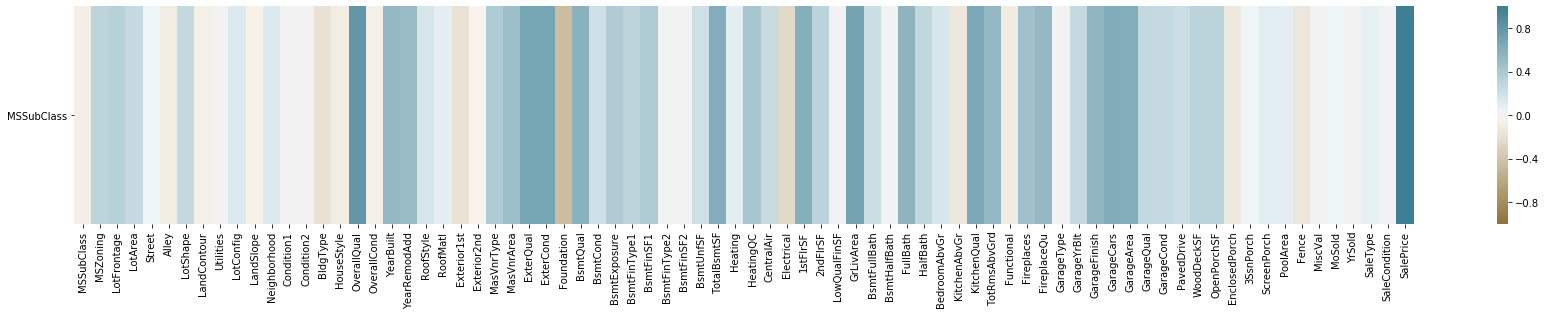

In [15]:
f,ax=plt.subplots(figsize=(30,4))
corr = data_cleaned.corr()
ax = sns.heatmap(corr.sort_values(by=['SalePrice'], ascending=False).head(1), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(420, 220, n=200),
    square=False
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='center'
    
)
ax.set_yticklabels(
    ax.get_xticklabels(),
    rotation=0,
    horizontalalignment='right')

In [16]:
corrVal=corr["SalePrice"].sort_values(ascending=False).to_frame()
corrVal.head(50)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
ExterCond,0.682639
ExterQual,0.682639
KitchenQual,0.659600
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852


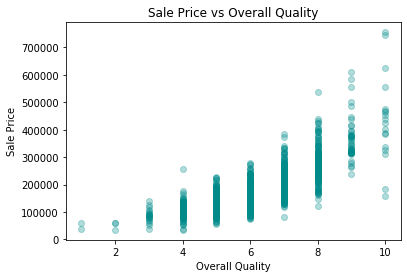

In [17]:
plt.scatter(data_cleaned["OverallQual"], data_cleaned["SalePrice"], c="darkcyan", alpha=0.3)
plt.title('Sale Price vs Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()



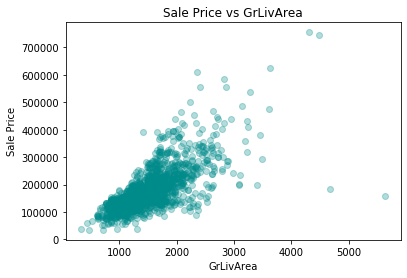

In [18]:
plt.scatter(data_cleaned["GrLivArea"], data_cleaned["SalePrice"], c="darkcyan", alpha=0.3)
plt.title('Sale Price vs GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('Sale Price')
plt.show()


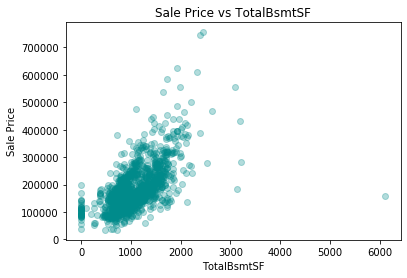

In [19]:
plt.scatter(data_cleaned["TotalBsmtSF"], data_cleaned["SalePrice"], c="darkcyan", alpha=0.3)
plt.title('Sale Price vs TotalBsmtSF')
plt.xlabel('TotalBsmtSF')
plt.ylabel('Sale Price')
plt.show()


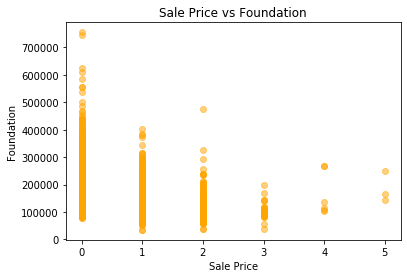

In [20]:
plt.scatter(data_cleaned["Foundation"], data_cleaned["SalePrice"], c="orange", alpha=0.5)
plt.title('Sale Price vs Foundation')
plt.xlabel('Sale Price')
plt.ylabel('Foundation')
plt.show()

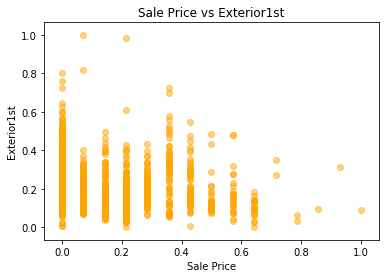

In [42]:
plt.scatter(data_cleaned["Exterior1st"], data_cleaned["SalePrice"], c="orange", alpha=0.5)
plt.title('Sale Price vs Exterior1st')
plt.xlabel('Sale Price')
plt.ylabel('Exterior1st')
plt.show()

To perform a PCA, the data should first be normalised. To do so, the data are scaled using their minimum and maximum values. 

In [43]:
scaler = MinMaxScaler()
data_columns = data_cleaned.columns
data_cleaned = scaler.fit_transform(data_cleaned)
data_cleaned = pd.DataFrame(data_cleaned, columns = data_columns)

Then the PCA is done. The explained variance ratio provides the amount of variance explained by each dimensions of the problem. These dimensions do not have clear meanings in our problem. 80% of the sale price could be explained by only 22 

In [30]:
pca=PCA()
pca.fit(data_cleaned.drop(columns="SalePrice"))
variance = np.cumsum(pca.explained_variance_ratio_)

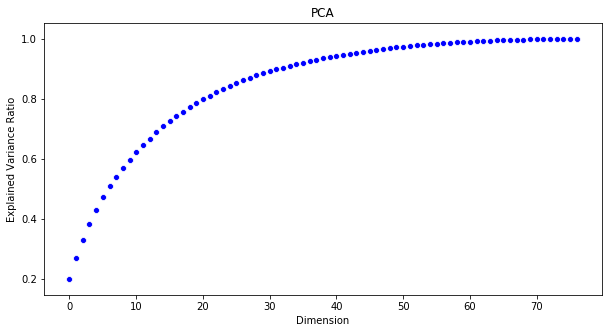

[0.19905123 0.26742233 0.32847383 0.38329135 0.42888212 0.47083941
 0.50746378 0.53994168 0.56995585 0.59622324 0.62129905 0.64448643
 0.66752833 0.68895911 0.708506   0.72559501 0.74226744 0.75760602
 0.7720642  0.785853   0.79893528 0.81110896 0.82293989 0.83340815]


In [39]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(data=variance,color='b')
ax.set(xlabel='Dimension', ylabel='Explained Variance Ratio')
plt.title("PCA")
plt.show()
print(variance[0:24])